# Data preparation

In [75]:
import warnings
# Ignoring future warnings and deprecation warnings so as not to make the notebook full of warnings
warnings.filterwarnings("ignore")

In [76]:
import pandas as pd
df = pd.read_csv('C:/Users/admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/financial_ratios.csv')
df.head()

,Unnamed: 0,ratio,cash_cycle,net_profit,profit_growth_(%),revenue,revenue_growth_(%),market_capital,eps_(vnd),p/e,...,current_ratio,asset_turnover,(st_+_lt_borrowings)/equity,financial_leverage,roic_(%),interest_coverage,fixed_asset_turnover,symbol,net_interest_income,net_interest_income_growth_(%)
0,0,Q4 2016,34.669095,41294860102,0.949968,6.676867e+11,0.451578,1.455455e+12,817.936153,10.250735,...,1.194128,0.241279,1.867892,2.708550,0.098567,9.449727,0.622732,AAA,NaN,NaN
1,1,Q1 2017,46.389765,66894667573,1.358928,7.335012e+11,0.728754,1.949325e+12,1303.709320,9.762348,...,1.130836,0.231739,1.767877,2.951434,0.093826,3.586883,0.512996,AAA,NaN,NaN
2,2,Q2 2017,40.549562,39129314217,0.162533,8.538257e+11,0.650835,1.970062e+12,733.182009,9.805468,...,1.236766,0.259321,1.562174,3.151398,0.103002,5.475838,0.573024,AAA,NaN,NaN
3,3,Q3 2017,30.415510,52029043164,0.345329,1.062929e+12,0.981942,2.399320e+12,948.578466,8.722134,...,1.029980,0.296958,1.682430,3.382632,0.108061,5.658713,0.678384,AAA,NaN,NaN
4,4,Q4 2017,21.999844,65289636792,0.581060,1.426508e+12,1.136493,3.344000e+12,1117.613576,7.486253,...,1.076307,0.341276,1.463173,3.390346,0.110601,3.841977,0.739243,AAA,NaN,NaN


In [77]:
df.shape

(2072, 37)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2072 non-null   int64  
 1   ratio                           2072 non-null   object 
 2   cash_cycle                      1652 non-null   float64
 3   net_profit                      2072 non-null   int64  
 4   profit_growth_(%)               2072 non-null   float64
 5   revenue                         1652 non-null   float64
 6   revenue_growth_(%)              1652 non-null   float64
 7   market_capital                  2064 non-null   float64
 8   eps_(vnd)                       2064 non-null   float64
 9   p/e                             2064 non-null   float64
 10  p/b                             2064 non-null   float64
 11  p/s                             1652 non-null   float64
 12  p/cash_flow                     16

In [79]:
null_counts = df.isnull().sum()
null_counts

Unnamed: 0                           0
ratio                                0
cash_cycle                         420
net_profit                           0
profit_growth_(%)                    0
revenue                            420
revenue_growth_(%)                 420
market_capital                       8
eps_(vnd)                            8
p/e                                  8
p/b                                  8
p/s                                420
p/cash_flow                        420
outstanding_share                    8
ev/ebitda                          420
bvps_(vnd)                          21
cash_ratio                         430
dept/equity                        430
roe_(%)                             40
roa_(%)                             40
days_sales_outstanding             430
days_inventory_outstanding         430
quick_ratio                        430
days_payable_outstanding           430
gross_profit_margin_(%)            430
ebit_margin_(%)          

In [80]:
df = df.drop(['net_interest_income_growth_(%)', 
              'net_interest_income', 
              'fixed_asset_turnover', 
              'interest_coverage', 
              'financial_leverage',
              '(st_+_lt_borrowings)/equity',
              'asset_turnover',
              'current_ratio',
              'ebit_margin_(%)',
              'days_payable_outstanding',
              'quick_ratio',
              'days_inventory_outstanding',
              'days_sales_outstanding',
              'roa_(%)',
              'dept/equity',
              'cash_ratio',
              'bvps_(vnd)',
              'ev/ebitda',
              'p/cash_flow',
              'p/s',
              'p/b',
              'cash_cycle',
              'Unnamed: 0'
             ], axis=1)

In [81]:
df = df.drop(['roic_(%)',
              'net_profit_margin_(%)',
              'gross_profit_margin_(%)',
             ], axis=1)

In [82]:
df.head()

,ratio,net_profit,profit_growth_(%),revenue,revenue_growth_(%),market_capital,eps_(vnd),p/e,outstanding_share,roe_(%),symbol
0,Q4 2016,41294860102,0.949968,6.676867e+11,0.451578,1.455455e+12,817.936153,10.250735,56964988.0,0.160569,AAA
1,Q1 2017,66894667573,1.358928,7.335012e+11,0.728754,1.949325e+12,1303.709320,9.762348,59249988.0,0.195754,AAA
2,Q2 2017,39129314217,0.162533,8.538257e+11,0.650835,1.970062e+12,733.182009,9.805468,59249988.0,0.193482,AAA
3,Q3 2017,52029043164,0.345329,1.062929e+12,0.981942,2.399320e+12,948.578466,8.722134,83599988.0,0.200697,AAA
4,Q4 2017,65289636792,0.581060,1.426508e+12,1.136493,3.344000e+12,1117.613576,7.486253,167199976.0,0.202759,AAA


In [83]:
rows_with_null_roe = df[df['roe_(%)'].isnull()]

rows_with_null_roe.head()

,ratio,net_profit,profit_growth_(%),revenue,revenue_growth_(%),market_capital,eps_(vnd),p/e,outstanding_share,roe_(%),symbol
96,Q4 2019,188306977799,3.685810,3.858591e+12,0.020681,1.201147e+12,1.885853,1.885853,258867849.0,NaN,ASM
111,Q3 2023,45340608112,-0.702948,2.876710e+12,-0.143775,3.109507e+12,13.033860,13.033860,336526752.0,NaN,ASM
251,Q3 2023,21507940866,1.909974,7.611919e+11,-0.655439,5.444038e+12,65.234210,65.234210,318364813.0,NaN,CII
503,Q3 2023,55899296772,-0.133327,7.946423e+11,-0.181378,3.344486e+12,10.574263,10.574263,80493048.0,NaN,DHC
839,Q3 2023,84402022043,-0.663910,4.596775e+11,-0.469203,8.469464e+12,12.624456,12.624456,305756841.0,NaN,HDG


In [84]:
from scipy.stats import trim_mean
trimmed_mean_roe = trim_mean(df['roe_(%)'].dropna(), 0.1)

df['roe_(%)'].fillna(trimmed_mean_roe, inplace=True)

In [85]:
trimmed_mean_market_capital = trim_mean(df['market_capital'].dropna(), 0.1)
trimmed_mean_eps = trim_mean(df['eps_(vnd)'].dropna(), 0.1)
trimmed_mean_pe = trim_mean(df['p/e'].dropna(), 0.1)
trimmed_mean_outstanding_share = trim_mean(df['outstanding_share'].dropna(), 0.1)

df['market_capital'].fillna(trimmed_mean_market_capital, inplace=True)
df['eps_(vnd)'].fillna(trimmed_mean_eps, inplace=True)
df['p/e'].fillna(trimmed_mean_pe, inplace=True)
df['outstanding_share'].fillna(trimmed_mean_outstanding_share, inplace=True)

In [86]:
revenue_null_value = df[df['revenue'].isnull()]
revenue_null_value.head(5)

,ratio,net_profit,profit_growth_(%),revenue,revenue_growth_(%),market_capital,eps_(vnd),p/e,outstanding_share,roe_(%),symbol
28,Q4 2016,328357000000,0.869021,NaN,NaN,2.346445e+13,333.052615,16.840941,9.859013e+08,0.097654,ACB
29,Q1 2017,478166000000,0.541099,NaN,NaN,2.543625e+13,485.003934,17.036278,9.859013e+08,0.107158,ACB
30,Q2 2017,501948000000,0.423082,NaN,NaN,3.085871e+13,509.126024,18.790015,9.859013e+08,0.114789,ACB
31,Q3 2017,546797000000,0.637990,NaN,NaN,4.101349e+13,554.616380,22.106506,9.859013e+08,0.129728,ACB
32,Q4 2017,591220000000,0.800540,NaN,NaN,4.554864e+13,599.674644,20.370602,1.084491e+09,0.143182,ACB


In [87]:
df = df.dropna()

In [88]:
null_counts = df.isnull().sum()
null_counts

ratio                 0
net_profit            0
profit_growth_(%)     0
revenue               0
revenue_growth_(%)    0
market_capital        0
eps_(vnd)             0
p/e                   0
outstanding_share     0
roe_(%)               0
symbol                0
dtype: int64

In [89]:
df.head()

,ratio,net_profit,profit_growth_(%),revenue,revenue_growth_(%),market_capital,eps_(vnd),p/e,outstanding_share,roe_(%),symbol
0,Q4 2016,41294860102,0.949968,6.676867e+11,0.451578,1.455455e+12,817.936153,10.250735,56964988.0,0.160569,AAA
1,Q1 2017,66894667573,1.358928,7.335012e+11,0.728754,1.949325e+12,1303.709320,9.762348,59249988.0,0.195754,AAA
2,Q2 2017,39129314217,0.162533,8.538257e+11,0.650835,1.970062e+12,733.182009,9.805468,59249988.0,0.193482,AAA
3,Q3 2017,52029043164,0.345329,1.062929e+12,0.981942,2.399320e+12,948.578466,8.722134,83599988.0,0.200697,AAA
4,Q4 2017,65289636792,0.581060,1.426508e+12,1.136493,3.344000e+12,1117.613576,7.486253,167199976.0,0.202759,AAA


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1652 entries, 0 to 2071
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ratio               1652 non-null   object 
 1   net_profit          1652 non-null   int64  
 2   profit_growth_(%)   1652 non-null   float64
 3   revenue             1652 non-null   float64
 4   revenue_growth_(%)  1652 non-null   float64
 5   market_capital      1652 non-null   float64
 6   eps_(vnd)           1652 non-null   float64
 7   p/e                 1652 non-null   float64
 8   outstanding_share   1652 non-null   float64
 9   roe_(%)             1652 non-null   float64
 10  symbol              1652 non-null   object 
dtypes: float64(8), int64(1), object(2)
memory usage: 154.9+ KB


In [91]:
df.to_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/financial_ratios_cleaned.csv')

# Rule-based for medium and long-term trading

### Fundamental Analysis Conditions

In [92]:
df['eps_growth(%)'] = ((df['eps_(vnd)'] - df.groupby('symbol')['eps_(vnd)'].shift(4)) / df.groupby('symbol')['eps_(vnd)'].shift(4)) * 100

In [93]:
df.isnull().sum()

ratio                   0
net_profit              0
profit_growth_(%)       0
revenue                 0
revenue_growth_(%)      0
market_capital          0
eps_(vnd)               0
p/e                     0
outstanding_share       0
roe_(%)                 0
symbol                  0
eps_growth(%)         236
dtype: int64

In [94]:
df = df.dropna()

In [95]:
df['profit_growth_(%)'] *= 100
df['revenue_growth_(%)'] *= 100

In [96]:
df.head(5)

,ratio,net_profit,profit_growth_(%),revenue,revenue_growth_(%),market_capital,eps_(vnd),p/e,outstanding_share,roe_(%),symbol,eps_growth(%)
4,Q4 2017,65289636792,58.105964,1.426508e+12,113.649265,3.344000e+12,1117.613576,7.486253,167199976.0,0.202759,AAA,36.638242
5,Q1 2018,49238222361,-26.394399,1.298292e+12,76.999306,2.909280e+12,818.576739,7.793048,167199976.0,0.176100,AAA,-37.211714
6,Q2 2018,36613161825,-6.430351,2.321958e+12,171.947581,2.431040e+12,427.625124,6.487935,171199976.0,0.132877,AAA,-41.675448
7,Q3 2018,42906658795,-17.533254,2.188615e+12,105.904117,2.448160e+12,463.772282,8.852480,171199976.0,0.102177,AAA,-51.108706
8,Q4 2018,51502432019,-21.116988,2.209962e+12,54.921154,3.167200e+12,428.736427,17.570128,171199976.0,0.081931,AAA,-61.638223


In [97]:
df.to_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/financial_ratios_cleaned.csv')

In [98]:
df_fundamental = df[['ratio','net_profit', 'profit_growth_(%)', 'revenue', 'revenue_growth_(%)','eps_(vnd)', 'eps_growth(%)', 'roe_(%)', 'symbol']]
df_fundamental

,ratio,net_profit,profit_growth_(%),revenue,revenue_growth_(%),eps_(vnd),eps_growth(%),roe_(%),symbol
4,Q4 2017,65289636792,58.105964,1.426508e+12,113.649265,1117.613576,36.638242,0.202759,AAA
5,Q1 2018,49238222361,-26.394399,1.298292e+12,76.999306,818.576739,-37.211714,0.176100,AAA
6,Q2 2018,36613161825,-6.430351,2.321958e+12,171.947581,427.625124,-41.675448,0.132877,AAA
7,Q3 2018,42906658795,-17.533254,2.188615e+12,105.904117,463.772282,-51.108706,0.102177,AAA
8,Q4 2018,51502432019,-21.116988,2.209962e+12,54.921154,428.736427,-61.638223,0.081931,AAA
...,...,...,...,...,...,...,...,...,...
2067,Q3 2022,220666896949,624.692618,6.521616e+11,126.295284,931.039774,-590.378907,0.245687,VSH
2068,Q4 2022,382126600956,98.261279,9.628110e+11,51.806880,1612.272023,98.121861,0.273152,VSH
2069,Q1 2023,476648446226,18.025005,8.921769e+11,10.340465,2011.079450,18.025005,0.272947,VSH
2070,Q2 2023,261808202789,1.863037,6.572797e+11,-0.577388,1104.623545,1.863037,0.265446,VSH


In [99]:
# The most recent quarter's EPS growth is greater than 15% compared to the same quarter of the previous year
def check_eps_growth_1stcondition(df_fundamental, latest_quarter, growth_threshold):
    # Filter DataFrame for the latest quarter
    latest_quarter_df = df_fundamental[df_fundamental['ratio'] == latest_quarter]
    # Check if the EPS growth is greater than the specified threshold
    latest_quarter_df['condition_met'] = latest_quarter_df['eps_growth(%)'] > growth_threshold
    return latest_quarter_df[['symbol', 'eps_growth(%)', 'condition_met']]

result_1st = check_eps_growth_1stcondition(df_fundamental, 'Q3 2023', 15)

result_1st.head()

,symbol,eps_growth(%),condition_met
27,AAA,10.483045,False
83,ANV,-99.156585,False
111,ASM,-97.126325,False
139,BCG,-81.370683,False
195,BMP,19.215057,True


In [100]:
# EPS growth for the two most recent quarters is greater than 15% compared to the same quarters of the previous year
def check_eps_growth_2ndcondition(df_fundamental, recent_quarters, growth_threshold):
    # Filter DataFrame for the recent quarters
    recent_quarter_df = df_fundamental[df_fundamental['ratio'].isin(recent_quarters)]

    # Group by stock symbol and check if EPS growth is greater than the threshold for all recent quarters
    result = recent_quarter_df.groupby('symbol').apply(
        lambda x: (x['eps_growth(%)'] > growth_threshold).all()
    )

    return result

recent_2nd = ['Q3 2023', 'Q2 2023']
result_2nd = check_eps_growth_2ndcondition(df_fundamental, recent_quarters, 15)

result_2nd.head()

symbol
AAA    False
ANV    False
ASM    False
BCG    False
BMP     True
dtype: bool

In [101]:
# Earnings Per Share (EPS) in each quarter of the last 12 months is at or near its peak
def assess_eps_near_peak_3rdcondition(df_fundamental, year):
    # Filter DataFrame for the specified year
    year_df = df_fundamental[df_fundamental['ratio'].str.contains(year)]

    # Function to check if EPS is at or near peak for each stock
    def is_eps_at_peak(stock_df):
        # Track the maximum EPS value encountered
        max_eps = 0
        for eps in stock_df['eps_(vnd)']:
            # Define "near peak" criteria (e.g., within 5% of the max)
            near_peak = max_eps * 0.95
            if eps < near_peak:
                return False
            max_eps = max(max_eps, eps)
        return True

    # Group by stock symbol and apply the check
    result = year_df.groupby('symbol').apply(is_eps_at_peak)
    
    return result

result_3rd = assess_eps_near_peak_3rdcondition(df, '2023')

result_3rd.head()

symbol
AAA    False
ANV    False
ASM    False
BCG    False
BMP    False
dtype: bool

In [103]:
# Most recent quarter's revenue is greater than 20% compared to the same quarter of the previous year
def check_revenue_growth_4thcondition(df_fundamental, latest_quarter, growth_threshold):
    # Filter DataFrame for the latest quarter
    latest_quarter_df = df_fundamental[df_fundamental['ratio'] == latest_quarter]

    # Check if the revenue growth is greater than the specified threshold
    latest_quarter_df['condition_met'] = latest_quarter_df['revenue_growth_(%)'] > growth_threshold

    # Return the DataFrame with an additional column indicating if the condition is met
    return latest_quarter_df[['symbol', 'revenue_growth_(%)', 'condition_met']]

result_4th = check_revenue_growth_4thcondition(df_fundamental, 'Q3 2023', 20)

result_4th.head()

,symbol,revenue_growth_(%),condition_met
27,AAA,7.290048,False
83,ANV,-11.797869,False
111,ASM,-14.377499,False
139,BCG,-11.671474,False
195,BMP,-37.554390,False


In [104]:
# Accelerating revenue growth over the last three quarters
def check_accelerating_revenue_growth_5thcondition(df_fundamental, quarters):
    # Filter DataFrame for the specified quarters
    filtered_df = df_fundamental[df_fundamental['ratio'].isin(quarters)]

    # Function to check if revenue growth is accelerating for each stock
    def is_growth_accelerating(stock_df):
        # Ensure the DataFrame is sorted by quarter
        stock_df = stock_df.sort_values(by='ratio')
        growth_rates = stock_df['revenue_growth_(%)'].tolist()

        # Check if each subsequent growth rate is greater than the previous
        return all(x < y for x, y in zip(growth_rates, growth_rates[1:]))

    # Group by stock symbol and apply the check
    result = filtered_df.groupby('symbol').apply(is_growth_accelerating)

    return result

relevant_quarters = ['Q1 2023', 'Q2 2023', 'Q3 2023']
result_5th = check_accelerating_revenue_growth_5thcondition(df_fundamental, relevant_quarters)

result_5th.head()

symbol
AAA    False
ANV    False
ASM    False
BCG    False
BMP    False
dtype: bool

In [105]:
# Accelerating profit growth over the last three quarters
def check_accelerating_profit_growth_6thcondition(df_fundamental, quarters):
    # Filter DataFrame for the specified quarters
    filtered_df = df_fundamental[df_fundamental['ratio'].isin(quarters)]

    # Function to check if revenue growth is accelerating for each stock
    def is_growth_accelerating(stock_df):
        # Ensure the DataFrame is sorted by quarter
        stock_df = stock_df.sort_values(by='ratio')
        growth_rates = stock_df['profit_growth_(%)'].tolist()

        # Check if each subsequent growth rate is greater than the previous
        return all(x < y for x, y in zip(growth_rates, growth_rates[1:]))

    # Group by stock symbol and apply the check
    result = filtered_df.groupby('symbol').apply(is_growth_accelerating)

    return result

relevant_quarters = ['Q1 2023', 'Q2 2023', 'Q3 2023']
result_6th = check_accelerating_profit_growth_6thcondition(df_fundamental, relevant_quarters)

result_6th.head()

symbol
AAA    False
ANV    False
ASM    False
BCG    False
BMP    False
dtype: bool

In [106]:
def check_roe_7thcondition(df_fundamental, current_quarter, roe_threshold):
    # Filter DataFrame for the current quarter
    current_quarter_df = df_fundamental[df_fundamental['ratio'] == current_quarter]

    # Check if the ROE is at least the specified threshold
    current_quarter_df['condition_met'] = current_quarter_df['roe_(%)'] >= roe_threshold

    # Return the DataFrame with an additional column indicating if the condition is met
    return current_quarter_df[['symbol', 'roe_(%)', 'condition_met']]

result_7th = check_roe_7thcondition(df_fundamental, 'Q3 2023', 15)

result_7th.head()

,symbol,roe_(%),condition_met
27,AAA,0.017459,False
83,ANV,0.050116,False
111,ASM,0.154016,False
139,BCG,-0.009286,False
195,BMP,0.367252,False


### Technical Analysis Conditions

In [107]:
df_technical = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/stock_price.csv')
df_technical.head()

,date,open,high,low,close,volume,symbol
0,1/3/2017,12.50,12.95,12.50,12.81,694080,AAA
1,1/4/2017,13.13,13.23,12.76,12.97,740770,AAA
2,1/5/2017,13.02,13.23,12.42,13.23,1057020,AAA
3,1/6/2017,13.02,13.05,12.50,12.76,823010,AAA
4,1/9/2017,12.76,13.65,12.55,13.54,777440,AAA


In [108]:
df_technical['date'] = pd.to_datetime(df_technical['date'])

In [109]:
df_technical.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
symbol            object
dtype: object

In [110]:
# Calculate EMA34-89 for each stock
df_technical['EMA34'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.ewm(span=34, adjust=False).mean())
df_technical['EMA89'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.ewm(span=89, adjust=False).mean())
df_technical.head()

,date,open,high,low,close,volume,symbol,EMA34,EMA89
0,2017-01-03,12.50,12.95,12.50,12.81,694080,AAA,12.810000,12.810000
1,2017-01-04,13.13,13.23,12.76,12.97,740770,AAA,12.819143,12.813556
2,2017-01-05,13.02,13.23,12.42,13.23,1057020,AAA,12.842620,12.822810
3,2017-01-06,13.02,13.05,12.50,12.76,823010,AAA,12.837899,12.821414
4,2017-01-09,12.76,13.65,12.55,13.54,777440,AAA,12.878019,12.837383


In [111]:
# Calculate MA5-20-50-150-200 for each stock
df_technical['MA5'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.rolling(window=5).mean())
df_technical['MA20'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.rolling(window=20).mean())
df_technical['MA50'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.rolling(window=50).mean())
df_technical['MA150'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.rolling(window=150).mean())
df_technical['MA200'] = df_technical.groupby('symbol')['close'].transform(lambda x: x.rolling(window=200).mean())
df_technical.head()

,date,open,high,low,close,volume,symbol,EMA34,EMA89,MA5,MA20,MA50,MA150,MA200
0,2017-01-03,12.50,12.95,12.50,12.81,694080,AAA,12.810000,12.810000,NaN,NaN,NaN,NaN,NaN
1,2017-01-04,13.13,13.23,12.76,12.97,740770,AAA,12.819143,12.813556,NaN,NaN,NaN,NaN,NaN
2,2017-01-05,13.02,13.23,12.42,13.23,1057020,AAA,12.842620,12.822810,NaN,NaN,NaN,NaN,NaN
3,2017-01-06,13.02,13.05,12.50,12.76,823010,AAA,12.837899,12.821414,NaN,NaN,NaN,NaN,NaN
4,2017-01-09,12.76,13.65,12.55,13.54,777440,AAA,12.878019,12.837383,13.062,NaN,NaN,NaN,NaN


In [112]:
df_technical = df_technical.dropna()
df_technical.head()

,date,open,high,low,close,volume,symbol,EMA34,EMA89,MA5,MA20,MA50,MA150,MA200
199,2017-10-20,20.03,20.18,19.63,19.66,1790670,AAA,19.725192,18.755320,20.062,19.9255,19.5004,17.419200,16.31395
200,2017-10-23,19.66,19.66,19.19,19.25,1497490,AAA,19.698038,18.766313,19.900,19.8735,19.5188,17.460000,16.34615
201,2017-10-24,19.25,19.42,19.22,19.39,772490,AAA,19.680436,18.780173,19.702,19.8400,19.5204,17.501733,16.37825
202,2017-10-25,19.39,19.60,19.39,19.57,355630,AAA,19.674125,18.797725,19.580,19.8155,19.5290,17.544667,16.40995
203,2017-10-26,19.54,19.57,19.14,19.22,754900,AAA,19.648175,18.807109,19.418,19.7950,19.5220,17.585800,16.44225


In [113]:
df_technical.shape

(137083, 14)

In [114]:
df_technical = df_technical.reset_index()

In [115]:
df_technical = df_technical.drop(['index'], axis=1)

In [116]:
df_technical

,date,open,high,low,close,volume,symbol,EMA34,EMA89,MA5,MA20,MA50,MA150,MA200
0,2017-10-20,20.03,20.18,19.63,19.66,1790670,AAA,19.725192,18.755320,20.062,19.9255,19.5004,17.419200,16.31395
1,2017-10-23,19.66,19.66,19.19,19.25,1497490,AAA,19.698038,18.766313,19.900,19.8735,19.5188,17.460000,16.34615
2,2017-10-24,19.25,19.42,19.22,19.39,772490,AAA,19.680436,18.780173,19.702,19.8400,19.5204,17.501733,16.37825
3,2017-10-25,19.39,19.60,19.39,19.57,355630,AAA,19.674125,18.797725,19.580,19.8155,19.5290,17.544667,16.40995
4,2017-10-26,19.54,19.57,19.14,19.22,754900,AAA,19.648175,18.807109,19.418,19.7950,19.5220,17.585800,16.44225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137078,2023-09-25,43.40,43.50,41.70,42.80,130200,VSH,44.093003,42.948250,42.760,44.0425,44.7900,40.751933,38.44715
137079,2023-09-26,43.95,43.95,43.00,43.30,83200,VSH,44.047688,42.956067,42.820,43.9225,44.7610,40.800267,38.51500
137080,2023-09-27,42.50,43.60,42.50,43.00,20600,VSH,43.987820,42.957043,42.900,43.8075,44.7310,40.849133,38.58460
137081,2023-09-28,43.00,43.90,43.00,43.50,4500,VSH,43.959945,42.969109,43.100,43.7175,44.7210,40.900667,38.65810


In [117]:
def check_emacross_8thcondition(df_technical):
    df_technical['EMA_Condition_Met'] = df_technical['EMA34'] > df_technical['EMA89']
    condition_met_by_stock = df_technical.groupby('symbol')['EMA_Condition_Met'].any()

    return condition_met_by_stock
result_8th = check_emacross_8thcondition(df_technical)
result_8th.head()

symbol
AAA    True
ACB    True
AGG    True
ANV    True
ASM    True
Name: EMA_Condition_Met, dtype: bool

In [118]:
def check_ma_9thcondition(df_technical):
    df_technical['MA_Condition_Met'] = (df_technical['MA50'] > df_technical['MA150']) & (df_technical['MA150'] > df_technical['MA200'])
    condition_met_by_stock = df_technical.groupby('symbol')['MA_Condition_Met'].any()
    return condition_met_by_stock
result_9th = check_ma_9thcondition(df_technical)
result_9th.head()

symbol
AAA    True
ACB    True
AGG    True
ANV    True
ASM    True
Name: MA_Condition_Met, dtype: bool

In [119]:
df_technical.to_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/stock_price_cleaned.csv')

### Conditions Evaluation

In [120]:
def evaluate_and_rank_stocks(df_fundamental, df_technical):
    latest_quarter = 'Q3 2023'
    recent_two_quarters = ['Q3 2023', 'Q2 2023']
    recent_three_quarters = ['Q3 2023', 'Q2 2023', 'Q1 2023']
    year = '2023'

    condition_1 = check_eps_growth_1stcondition(df_fundamental, latest_quarter, 15)['condition_met']
    condition_2 = check_eps_growth_2ndcondition(df_fundamental, recent_two_quarters, 15)
    condition_3 = assess_eps_near_peak_3rdcondition(df_fundamental, year)
    condition_4 = check_revenue_growth_4thcondition(df_fundamental, latest_quarter, 20)['condition_met']
    condition_5 = check_accelerating_revenue_growth_5thcondition(df_fundamental, recent_three_quarters)
    condition_6 = check_accelerating_profit_growth_6thcondition(df_fundamental, recent_three_quarters)
    condition_7 = check_roe_7thcondition(df_fundamental, latest_quarter, 15)['condition_met']
    condition_8 = check_emacross_8thcondition(df_technical)
    condition_9 = check_ma_9thcondition(df_technical)

    combined = pd.DataFrame({
        'Condition 1': condition_1,
        'Condition 2': condition_2,
        'Condition 3': condition_3,
        'Condition 4': condition_4,
        'Condition 5': condition_5,
        'Condition 6': condition_6,
        'Condition 7': condition_7,
        'Condition 8': condition_8,
        'Condition 9': condition_9
    })

    combined['Total Conditions Met'] = combined.sum(axis=1)

    ranked_stocks = combined.sort_values(by='Total Conditions Met', ascending=False)

    return ranked_stocks

ranked_stocks = evaluate_and_rank_stocks(df_fundamental, df_technical)

In [121]:
ranked_stocks['Ranking'] = ranked_stocks['Total Conditions Met'].rank(ascending=False, method='first').astype(int)
ranked_stocks.head(10)

,Condition 1,Condition 2,Condition 3,Condition 4,Condition 5,Condition 6,Condition 7,Condition 8,Condition 9,Total Conditions Met,Ranking
SSI,NaN,True,True,NaN,True,True,NaN,True,True,6,1
HPG,NaN,False,True,NaN,True,True,NaN,True,True,5,2
SJS,NaN,True,False,NaN,True,True,NaN,True,True,5,3
VND,NaN,False,True,NaN,True,True,NaN,True,True,5,4
VNM,NaN,False,True,NaN,False,True,NaN,True,True,4,5
VGC,NaN,False,False,NaN,True,True,NaN,True,True,4,6
HCM,NaN,False,True,NaN,False,True,NaN,True,True,4,7
MWG,NaN,False,False,NaN,True,True,NaN,True,True,4,8
NKG,NaN,False,False,NaN,True,True,NaN,True,True,4,9
CTD,NaN,False,True,NaN,False,True,NaN,True,True,4,10


In [122]:
ranked_stocks.to_excel('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/stock_ranking.xlsx', index=False)

# Porfolio Optimization

### Modern Porfolio Theory

In [290]:
df_porfolio_optimization = pd.read_csv('C:/Users/Admin/OneDrive/Desktop/Personal Items/Stock Recommendation System Project/top_stocks.csv')
df_porfolio_optimization.head()

,date,SSI,VND,HPG,SJS,NKG,MWG,HCM,VGC,VNM,CTD
0,10/20/2017,10.68,3.46,9.37,25.110001,15.96,29.889999,40.169998,16.660000,80.940002,142.860001
1,10/23/2017,10.38,3.45,9.28,23.590000,15.83,29.420000,37.770000,16.660000,80.660004,138.789993
2,10/24/2017,10.27,3.44,9.38,24.150000,15.74,30.010000,38.340000,16.809999,81.209999,140.190002
3,10/25/2017,10.29,3.32,9.34,24.629999,15.69,30.780001,39.299999,16.950001,82.029999,140.190002
4,10/26/2017,10.20,3.23,9.25,24.430000,15.85,30.549999,38.540001,16.879999,82.730003,140.190002


In [291]:
df_porfolio_optimization.isnull().sum()

date      0
SSI      15
VND      56
HPG      37
SJS     243
NKG      30
MWG      23
HCM      20
VGC      15
VNM      28
CTD      31
dtype: int64

In [292]:
df_porfolio_optimization = df_porfolio_optimization.drop(['SJS', 'HCM', 'VGC', 'VNM','CTD'], axis=1)

In [293]:
df_porfolio_optimization = df_porfolio_optimization.dropna()

In [294]:
df_porfolio_optimization = df_porfolio_optimization.reset_index()

In [295]:
df_porfolio_optimization = df_porfolio_optimization.drop(['index'], axis=1)

In [296]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from datetime import datetime, timedelta

In [297]:
df_porfolio_optimization['date'] = pd.to_datetime(df_porfolio_optimization['date'])

In [298]:
df_porfolio_optimization.dtypes

date    datetime64[ns]
SSI            float64
VND            float64
HPG            float64
NKG            float64
MWG            float64
dtype: object

In [299]:
df_porfolio_optimization.head()

,date,SSI,VND,HPG,NKG,MWG
0,2017-10-20,10.68,3.46,9.37,15.96,29.889999
1,2017-10-23,10.38,3.45,9.28,15.83,29.420000
2,2017-10-24,10.27,3.44,9.38,15.74,30.010000
3,2017-10-25,10.29,3.32,9.34,15.69,30.780001
4,2017-10-26,10.20,3.23,9.25,15.85,30.549999


In [300]:
# Calculate the Lognormal Returns for each stock
df_numerical = df_porfolio_optimization.select_dtypes(include=[np.number])
log_returns = np.log(df_numerical / df_numerical.shift(1))

In [301]:
log_returns = log_returns.dropna()

In [302]:
log_returns.isnull().sum()

SSI    0
VND    0
HPG    0
NKG    0
MWG    0
dtype: int64

In [303]:
# Calculate the covariance matrix using annualized log returns
cov_matrix = log_returns.cov()*252
cov_matrix

,SSI,VND,HPG,NKG,MWG
SSI,0.200031,0.019659,0.099910,0.113590,0.082678
VND,0.019659,0.261878,0.016466,0.011694,0.005849
HPG,0.099910,0.016466,0.147862,0.126121,0.070809
NKG,0.113590,0.011694,0.126121,0.262883,0.074898
MWG,0.082678,0.005849,0.070809,0.074898,0.141698


In [304]:
# Calculate the porfolio standard deviation
def standard_deviation (weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [305]:
# Calculate the expected return 
def expected_return (weights, log_return):
    return np.sum(log_return.mean()*weights)*252

In [306]:
# Calculate the sharpe ratio
def sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return (expected_return (weights, log_return) - risk_free_rate) / standard_deviation (weights, cov_matrix) 

In [307]:
# Set the risk free rate 
risk_free_rate = 0.02

In [308]:
def neg_sharpe_ratio (weights, log_return, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

In [309]:
tickers = df_porfolio_optimization.columns.drop('date')

In [310]:
# Set the constraints and bounds
constraints = {'type' : 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0, 0.4) for _ in range(len(tickers))]

In [311]:
# Set the initial weights
initial_weights = np.array([1/len(tickers)]*len(tickers))
initial_weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [312]:
# Optimize the weights to maximize the Sharpe Ratio
optimized_results = minimize(neg_sharpe_ratio, initial_weights,args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)

In [313]:
# Get optimal weights 
optimal_weights = optimized_results.x

In [314]:
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
SSI: 0.2310
VND: 0.4000
HPG: 0.3690
NKG: 0.0000
MWG: 0.0000
Expected Annual Return: 0.2658
Expected Volatility: 0.3134
Sharpe Ratio: 0.7842


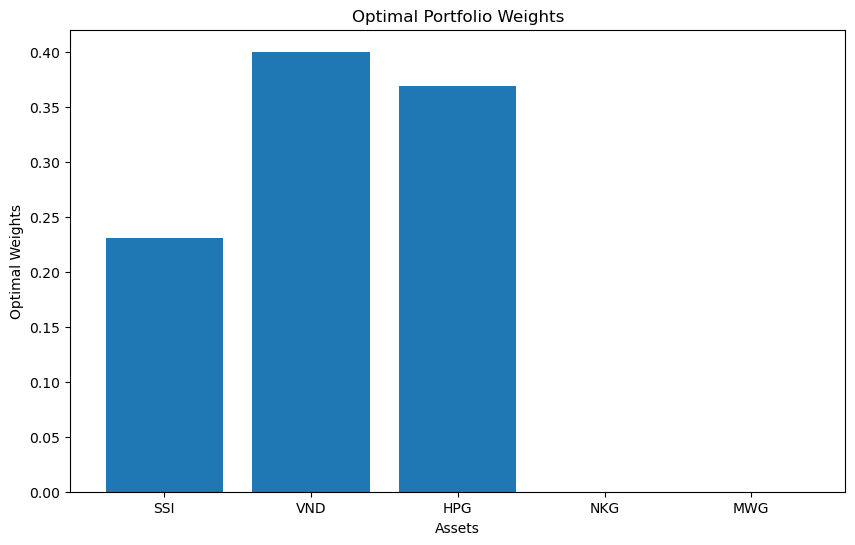

In [315]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()